# Doc2Vec to requirements (315 repositories / train set)

## 1. Downloading the train set

In [1]:
!pip3 install gdown
!gdown 13Z-ReDj4QcwlfvIgUlL6MNE5W2dcPmLr


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Downloading...
From (uriginal): https://drive.google.com/uc?id=13Z-ReDj4QcwlfvIgUlL6MNE5W2dcPmLr
From (redirected): https://drive.google.com/uc?id=13Z-ReDj4QcwlfvIgUlL6MNE5W2dcPmLr&confirm=t&uuid=681671a5-49ad-4a9d-9ed4-d4cf3fd9f980
To: /Users/Henry/Documents/PyCharmProjects/RepoSim4Py/Doc2vec/repo_info_train.pkl
100%|████████████████████████████████████████| 202M/202M [00:12<00:00, 15.7MB/s]


In [2]:
import pickle

with open("repo_info_train.pkl", "rb") as f:
    repo_info_train = pickle.load(f)
    f.close()

In [3]:
next(iter(repo_info_train.keys()))

'jet-admin/jet-bridge'

In [4]:
type(repo_info_train[next(iter(repo_info_train.keys()))]["requirements"]) # list

list

In [5]:
repo_info_train[next(iter(repo_info_train.keys()))]["requirements"]

['cryptography',
 'dateparser',
 'graphene',
 'graphql',
 'jet-bridge',
 'jet-django',
 'jwt',
 'Pillow',
 'prompt-toolkit',
 'requests',
 'setuptools',
 'six',
 'SQLAlchemy',
 'tornado',
 'social-auth-core',
 'social-auth-core-tweaked',
 'social-auth-core2',
 'social-core-optimized',
 'steamid-social-auth-core']

In [6]:
" ".join(repo_info_train[next(iter(repo_info_train.keys()))]["requirements"])

'cryptography dateparser graphene graphql jet-bridge jet-django jwt Pillow prompt-toolkit requests setuptools six SQLAlchemy tornado social-auth-core social-auth-core-tweaked social-auth-core2 social-core-optimized steamid-social-auth-core'

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = [repo_info_train[repo_name]["topic"] for repo_name in list(repo_info_train.keys())]
encoded_labels = label_encoder.fit_transform(labels)

# Print the encoded labels
print(encoded_labels)

[  1  64  32  25  52  18  41  95  72  10  24 103  60 106  15  50  13  75
  29  44  82 112  36  39  49  83  58  58 118  43  63  66   2  93 109  48
  29  70  78   4  67  43  28  87 117 104  91  64  72  52  55  29  91   2
  90  64  83  41  72 109  74  56  96  16 109  17  29 117 112  67  77  14
  54  10   9  72  82  97  76  46  31  43  99  21 118  98   7  96  62  74
  79  57 105  83  30  49   7  75  60  44  13  59  98  86  52 116  52  29
  37 111 110  26  15 115  31  49  31  92 113   6  72 116  66  83   3  69
  21 111  42  22  81  51  69  47  16  22 109  27  51  68 115   2  93 117
  64  70  91  84  49  76  13 109  91   0  11  47  56  98  31  34   6  37
  40  40  70  47  58  53 117  68  63   1  44 118  52 101  44  58  43  80
   9 108  91 118  66  24  71  91  91  97 110  22  87  38  13  45   9  82
  86  47  47 114  26 116 117  19 113  41 107 115  43  47  94  27  48  56
  12  33  25  49  37  45  96  25  41  32  56   8  19 104  62 100 104   6
  76  56  72  97 119   6  11  23  27  52  25  74  4

## 2. Processing data and building corpus

In [7]:
!pip3 install gensim


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [11]:
# Building the corpus
corpus = []
for repo_name, repo_dict in repo_info_train.items():
    requirements_str = " ".join(repo_info_train[repo_name]["requirements"])
    corpus.append(requirements_str)

In [12]:
len(corpus)

315

In [13]:
file_path = "requirements_train_corpus.txt"

with open(file_path, "w") as file:
    for sentence in corpus:
        file.write(sentence + "\n")

file.close()

## 3. Building doc2vec model

In [14]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [35]:
import gensim
import smart_open

# Read corpus: an iterator
def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="utf-8") as f:
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(str(tokens), [encoded_labels[i]])

train_corpus = list(read_corpus(file_path))

In [36]:
len(train_corpus)

315

In [191]:
# Building the Doc2Vec model.
model = gensim.models.doc2vec.Doc2Vec(vector_size=10, min_count=2, epochs=100)

2023-07-06 19:04:13,972 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec<dm/m,d10,n5,w5,mc2,s0.001,t3>', 'datetime': '2023-07-06T19:04:13.972474', 'gensim': '4.3.1', 'python': '3.10.12 (main, Jun 20 2023, 19:43:52) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.4.1-arm64-arm-64bit', 'event': 'created'}


In [192]:
# Adding corpus to model.
model.build_vocab(train_corpus)

2023-07-06 19:04:14,135 : INFO : collecting all words and their counts
2023-07-06 19:04:14,136 : WARNING : Each 'words' should be a list of words (usually unicode strings). First 'words' here is instead plain <class 'str'>.
2023-07-06 19:04:14,136 : INFO : PROGRESS: at example #0, processed 0 words (0 words/s), 0 word types, 0 tags
2023-07-06 19:04:14,163 : INFO : collected 32 word types and 120 unique tags from a corpus of 315 examples and 176450 words
2023-07-06 19:04:14,164 : INFO : Creating a fresh vocabulary
2023-07-06 19:04:14,165 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=2 retains 32 unique words (100.00% of original 32, drops 0)', 'datetime': '2023-07-06T19:04:14.165108', 'gensim': '4.3.1', 'python': '3.10.12 (main, Jun 20 2023, 19:43:52) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.4.1-arm64-arm-64bit', 'event': 'prepare_vocab'}
2023-07-06 19:04:14,165 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 176450 word corpus

In [193]:
# Training
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

2023-07-06 19:04:14,315 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 32 vocabulary and 10 features, using sg=0 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2023-07-06T19:04:14.315903', 'gensim': '4.3.1', 'python': '3.10.12 (main, Jun 20 2023, 19:43:52) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.4.1-arm64-arm-64bit', 'event': 'train'}
2023-07-06 19:04:14,369 : INFO : EPOCH 0: training on 176450 raw words (32746 effective words) took 0.0s, 698179 effective words/s
2023-07-06 19:04:14,399 : INFO : EPOCH 1: training on 176450 raw words (33030 effective words) took 0.0s, 1123242 effective words/s
2023-07-06 19:04:14,423 : INFO : EPOCH 2: training on 176450 raw words (32815 effective words) took 0.0s, 1494980 effective words/s
2023-07-06 19:04:14,446 : INFO : EPOCH 3: training on 176450 raw words (33059 effective words) took 0.0s, 1524153 effective words/s
2023-07-06 19:04:14,469 : INFO : EPOCH 4: training on 176450

2023-07-06 19:04:15,737 : INFO : EPOCH 59: training on 176450 raw words (32846 effective words) took 0.0s, 1530123 effective words/s
2023-07-06 19:04:15,760 : INFO : EPOCH 60: training on 176450 raw words (33051 effective words) took 0.0s, 1492981 effective words/s
2023-07-06 19:04:15,783 : INFO : EPOCH 61: training on 176450 raw words (32975 effective words) took 0.0s, 1565145 effective words/s
2023-07-06 19:04:15,807 : INFO : EPOCH 62: training on 176450 raw words (32852 effective words) took 0.0s, 1443074 effective words/s
2023-07-06 19:04:15,830 : INFO : EPOCH 63: training on 176450 raw words (32776 effective words) took 0.0s, 1517841 effective words/s
2023-07-06 19:04:15,852 : INFO : EPOCH 64: training on 176450 raw words (33002 effective words) took 0.0s, 1583706 effective words/s
2023-07-06 19:04:15,875 : INFO : EPOCH 65: training on 176450 raw words (32943 effective words) took 0.0s, 1509511 effective words/s
2023-07-06 19:04:15,897 : INFO : EPOCH 66: training on 176450 raw wor

In [194]:
vector = model.infer_vector(repo_info_train[next(iter(repo_info_train.keys()))]["requirements"])
vector.shape

(10,)

## 4. Similarity calculation

In [195]:
import torch
from tqdm import tqdm
from torch.nn import CosineSimilarity
from itertools import combinations
import pandas as pd

cossim = CosineSimilarity(dim=0, eps=1e-8)
res = []
num_of_repos = len(repo_info_train)
num_of_rows = num_of_repos * (num_of_repos - 1) // 2

for repo1, repo2 in tqdm(combinations(repo_info_train.keys(), 2), total=num_of_rows):
    row = [repo1, repo2, repo_info_train[repo1]["topic"], repo_info_train[repo2]["topic"]]
    embedding1 = torch.tensor(model.infer_vector(repo_info_train[repo1]["requirements"]))
    embedding2 = torch.tensor(model.infer_vector(repo_info_train[repo2]["requirements"]))
    similarity = cossim(embedding1, embedding2).cpu().detach().numpy().item()
    row.append(similarity)

    res.append(row)

df = pd.DataFrame(res, columns=["repo1", "repo2", "topic1", "topic2", "doc2vec_requirement"])
df

100%|████████████████████████████████████| 49455/49455 [01:31<00:00, 543.23it/s]


,repo1,repo2,topic1,topic2,doc2vec_requirement
0,jet-admin/jet-bridge,patrys/httmock,Admin Panels,Mock,0.308600
1,jet-admin/jet-bridge,pytransitions/transitions,Admin Panels,Design Patterns,0.282761
2,jet-admin/jet-bridge,keleshev/schema,Admin Panels,Data Validation,-0.665275
3,jet-admin/jet-bridge,dylanaraps/pywal,Admin Panels,Image Processing,0.222175
4,jet-admin/jet-bridge,PyCQA/modernize,Admin Panels,Compatibility,0.074159
...,...,...,...,...,...
49450,thauber/django-schedule,Miserlou/Zappa,Job Scheduler,Serverless Frameworks,-0.203911
49451,thauber/django-schedule,jek/blinker,Job Scheduler,Miscellaneous,0.061479
49452,Yelp/mrjob,Miserlou/Zappa,Batch Processing,Serverless Frameworks,-0.313502
49453,Yelp/mrjob,jek/blinker,Batch Processing,Miscellaneous,0.228932


In [196]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,repo1,repo2,topic1,topic2,doc2vec_requirement
0,jet-admin/jet-bridge,patrys/httmock,Admin Panels,Mock,0.308600
1,jet-admin/jet-bridge,pytransitions/transitions,Admin Panels,Design Patterns,0.282761
2,jet-admin/jet-bridge,keleshev/schema,Admin Panels,Data Validation,-0.665275
3,jet-admin/jet-bridge,dylanaraps/pywal,Admin Panels,Image Processing,0.222175
4,jet-admin/jet-bridge,PyCQA/modernize,Admin Panels,Compatibility,0.074159
...,...,...,...,...,...
49450,thauber/django-schedule,Miserlou/Zappa,Job Scheduler,Serverless Frameworks,-0.203911
49451,thauber/django-schedule,jek/blinker,Job Scheduler,Miscellaneous,0.061479
49452,Yelp/mrjob,Miserlou/Zappa,Batch Processing,Serverless Frameworks,-0.313502
49453,Yelp/mrjob,jek/blinker,Batch Processing,Miscellaneous,0.228932


In [197]:
df.sort_values("doc2vec_requirement", ascending=False).reset_index(drop=True)

,repo1,repo2,topic1,topic2,doc2vec_requirement
0,shinux/PyTime,vinta/pangu.py,Date and Time,Specific Formats Processing - General,1.000000
1,dylanaraps/pywal,martinblech/xmltodict,Image Processing,HTML Manipulation,1.000000
2,vinta/pangu.py,martinblech/xmltodict,Specific Formats Processing - General,HTML Manipulation,1.000000
3,glamp/bashplotlib,shinux/PyTime,Terminal Rendering,Date and Time,1.000000
4,glamp/bashplotlib,unoconv/unoconv,Terminal Rendering,Office,1.000000
...,...,...,...,...,...
49450,Alir3z4/html2text,spotify/dh-virtualenv,Web Content Extracting,Distribution,-0.919230
49451,spotify/dh-virtualenv,faif/python-patterns,Distribution,Design Patterns,-0.919230
49452,django-haystack/pysolr,bokeh/bokeh,Search,Data Visualization,-0.921980
49453,WiserTogether/django-remote-forms,stephenmcd/hot-redis,Forms,NoSQL Databases,-0.924973


In [198]:
df.to_csv("requirements_doc2vec_evaluation_train_315.csv")

## 5. Evaluation

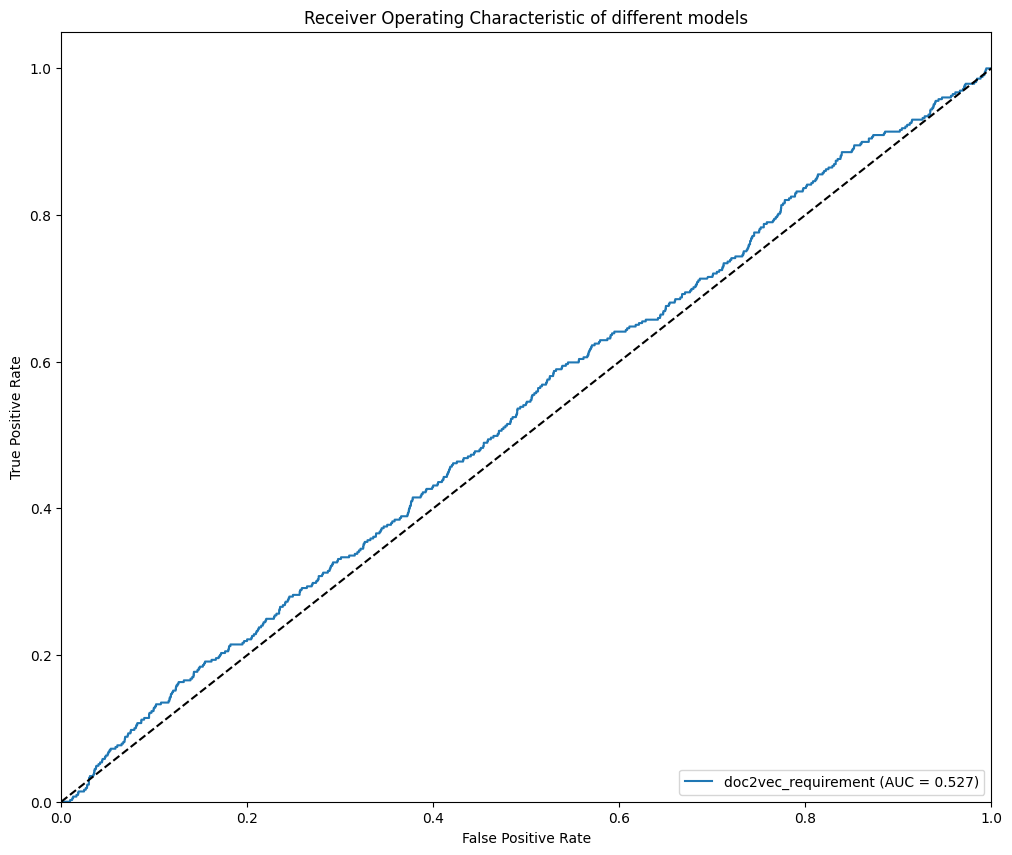

In [199]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model_auc = {}
y_true = df['topic1'] == df['topic2']
fig = plt.figure(figsize=(12, 10))

model_names = ["doc2vec_requirement"]

def roc(model_name):
    y_score = df[model_name]
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    model_auc[model_name] = roc_auc

    plt.plot(fpr, tpr, label=model_name)


for model_name in model_names:
    roc(model_name)

# Order labels by each model's auc score
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: -model_auc[labels[k]])
ordered_handles = [handles[idx] for idx in order]
ordered_labels = [f'{labels[idx]} (AUC = {model_auc[labels[idx]]:.3f})' for idx in order]
plt.legend(ordered_handles, ordered_labels, loc="lower right")

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of different models')
# Evaluation result
plt.savefig('roc_doc2vec_requirements_evaluation_train_315.png')
plt.show()

In [200]:
model_auc

{'doc2vec_requirement': 0.5267292166080564}